# MaNGA File

/project/projectdirs/sdss/data/sdss/dr17/manga/spectro/redux/v3_1_1/drpall-v3_1_1.fits

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
import pandas as pd
from astropy.table import Table
from astropy.coordinates import SkyCoord, match_coordinates_sky
from astropy import units as u

In [2]:
h = 1
H0 = 100*h

c = 3e5

q0 = 0.2

In [3]:
drpall_file = get_pkg_data_filename('/project/projectdirs/sdss/data/sdss/dr17/manga/spectro/redux/v3_1_1/drpall-v3_1_1.fits')
fits.info(drpall_file)

Filename: /project/projectdirs/sdss/data/sdss/dr17/manga/spectro/redux/v3_1_1/drpall-v3_1_1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  MANGA         1 BinTableHDU    209   11273R x 99C   [K, 32A, 32A, 32A, 32A, 32A, 32A, 32A, 32A, 32A, 32A, D, D, D, D, D, D, D, K, D, K, D, D, 53A, K, 32A, K, D, D, D, D, D, D, D, D, D, D, D, K, K, K, D, D, D, D, K, K, K, K, 32A, K, 19A, K, K, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, K, K, K, 6A, K, K, D, D, 7D, 7D, 7D, D, D, D, D, 7D, D, D, 7D, 7D, 7D, 7D, D, D, D, D, 7D, 7D]   
  2  MASTAR        1 BinTableHDU    209   35394R x 99C   [K, 32A, 32A, 32A, 32A, 32A, 32A, 32A, 32A, 32A, 32A, D, D, D, D, D, D, D, K, D, K, D, D, 53A, K, 32A, K, D, D, D, D, D, D, D, D, D, D, D, K, K, K, D, D, D, D, K, K, K, K, 32A, K, 19A, K, K, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, K, K, K, 6A, K, K, D, D, 7D, 7D, 7D, D, D, D, D, 7D, D, D, 7D, 7D, 7D, 7D, D, D, D, D, 7D, 7D]

In [4]:
drpall = Table.read(drpall_file, format = 'fits', hdu = 1)
drpall

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag [7],nsa_elpetro_absmag [7],nsa_elpetro_amivar [7],nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction [7],nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux [7],nsa_petro_flux_ivar [7],nsa_elpetro_flux [7],nsa_elpetro_flux_ivar [7],nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux [7],nsa_sersic_flux_ivar [7]
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
10001,12701,10001-12701,1-48157,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,133.371090612,57.5984251446,159.27921887,38.8381829181,133.37109,57.598425,0.0545561,9,8100.81,0,20.0835,41.292,ma079,22,3,9114,134.41357,57.604214,1.10715,1.15321,1.21404,1.78219,1.85994,2.12685,0.898721,0.929654,0.937466,57372,57373,57373,2.69906,2.64546,2.59645,2.54039,2080,0,0,1,plateTargets-1.par,6013,J085329.03+573554.9,127,127,0,0.0392074,0.0193562,0.0264775,0.0386959,0.0429176,0.0193562,0.0264775,0.748562,-999.0,0.665321,0.705378,1.08789,1.19925,-999.0,0.66562,0.705713,203,1350,6,v1_0_1,51226,-999,0.0392074,0.0395926,-16.2982 .. -19.5112,-16.2321 .. -19.5522,275.541 .. 452.944,3068010000.0,2685340000.0,0.417013,69.2463,0.448783 .. 0.0800664,5.16633,3.63987,12.7947 .. 413.049,3.26768 .. 0.000422625,13.8306 .. 425.941,3.03694 .. 0.00496838,0.335333,0.741845,68.2584,5.29184,14.8124 .. 412.19,2.50888 .. 0.0150605
10001,12702,10001-12702,1-48188,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,133.685669869,57.4802503218,159.390126911,39.0253440844,133.68567,57.48025,0.0492053,9,8100.81,0,20.0835,41.292,ma078,25,3,9114,134.41357,57.604214,1.10569,1.15089,1.21106,1.78219,1.85994,2.12685,0.898721,0.929654,0.937466,57372,57373,57373,2.72072,2.66314,2.64652,2.61686,2080,0,0,1,plateTargets-1.par,6013,J085444.56+572848.8,127,217,0,0.0408108,0.0193227,0.0264533,0.0386469,0.042869,0.0188554,0.0266531,0.794785,-999.0,0.651037,0.681893,1.04947,1.13205,-999.0,0.631507,0.660498,35,3600,5,v1_0_1,51261,-999,0.0408108,0.0411932,-15.9069 .. -19.6569,-16.127 .. -19.5493,206.664 .. 49.3569,5341650000.0,4642460000.0,0.598115,12.5169,0.405779 .. 0.072394,7.01311,6.11281,12.4553 .. 396.399,2.27628 .. 0.000372112,12.4406 .. 390.985,2.3517 .. 0.000398299,0.508217,1.44272,12.3759,8.34906,10.1128 .. 432.884,3.38905 .. 0.00964978
10001,12703,10001-12703,1-55648,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,136.017159969,57.0923291779,159.56459216,40.3368076472,136.01716,57.092329,0.0258626,9,8100.81,0,19.9086,40.7596,ma077,31,3,9114,134.41357,57.604214,1.09975,1.13824,1.19323,1.78219,1.85994,2.12685,0.898721,0.929654,0.937466,57372,57373,57373,2.7262,2.61384,2.56576,2.53132,2080,0,

### Plotting Data

In [5]:
def plot_gp(RA,Dec,org=0,title='Mollweide projection', projection='mollweide'):
    ''' RA, Dec are arrays of the same length.
    RA takes values in [0,360), Dec in [-90,90],
    which represent angles in degrees.
    org is the origin of the plot, 0 or a multiple of 30 degrees in [0,360).
    title is the title of the figure.
    projection is the kind of projection: 'mollweide', 'aitoff', 'hammer', 'lambert'
    '''
    x = np.remainder(RA+360-org,360) # shift RA values
    ind = x>180
    x[ind] -=360    # scale conversion to [-180, 180]
    x=-x    # reverse the scale: East to the left
    tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
    tick_labels = np.remainder(tick_labels+360+org,360)
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection=projection)
    ax.scatter(np.radians(x),np.radians(Dec))  # convert degrees to radians
    ax.set_xticklabels(tick_labels)     # we add the scale on the x axis
    ax.set_title(title)
    ax.title.set_fontsize(15)
    ax.set_xlabel("RA")
    ax.xaxis.label.set_fontsize(12)
    ax.set_ylabel("Dec")
    ax.yaxis.label.set_fontsize(12)
    ax.grid(True)

In [6]:
def plot_mwd(RA,Dec,RAII,DecII,name,org=0,title='Mollweide projection', projection='mollweide'):
    ''' RA, Dec are arrays of the same length.
    RA takes values in [0,360), Dec in [-90,90],
    which represent angles in degrees.
    org is the origin of the plot, 0 or a multiple of 30 degrees in [0,360).
    title is the title of the figure.
    projection is the kind of projection: 'mollweide', 'aitoff', 'hammer', 'lambert'
    '''
    x = np.remainder(RA+360-org,360) # shift RA values
    ind = x>180
    x[ind] -=360    # scale conversion to [-180, 180]
    x=-x    # reverse the scale: East to the left
    y = np.remainder(RAII+360-org,360) # shift RA values
    indy = y>180
    y[indy] -=360    # scale conversion to [-180, 180]
    y=-y    # reverse the scale: East to the left
    tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
    tick_labels = np.remainder(tick_labels+360+org,360)
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection=projection)
    ax.scatter(np.radians(x),np.radians(Dec), color='blue', marker='o', zorder=2)  # convert degrees to radians
    for i, txt in enumerate(name):
        ax.annotate(txt, (np.radians(x[i]), np.radians(Dec[i])))
    ax.scatter(np.radians(y),np.radians(DecII), color='orange', marker='o', zorder=1)
    ax.set_xticklabels(tick_labels)     # we add the scale on the x axis
    ax.set_title(title)
    ax.title.set_fontsize(15)
    ax.set_xlabel("RA")
    ax.xaxis.label.set_fontsize(12)
    ax.set_ylabel("Dec")
    ax.yaxis.label.set_fontsize(12)
    ax.grid(True)

In [7]:
drpallRA = drpall['objra']
drpallDec = drpall['objdec']

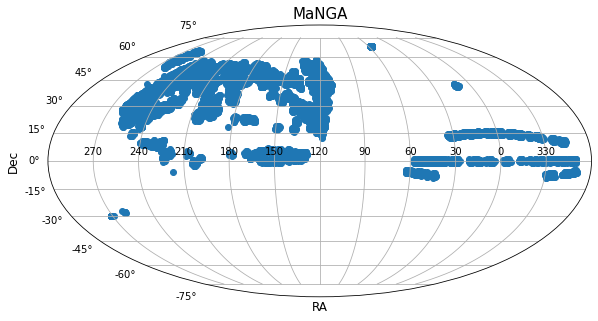

In [8]:
plot_gp(drpallRA, drpallDec, 120, 'MaNGA')

### Plot MaNGA and CosmicFlows-4

In [9]:
name = ['Virgo', 'NGC 70', 'NGC 80', 'NGC 410', 'NGC 507', 'Abell 262', 'Abell 400', 'Fornax', 'Antlia', 'Hydra', 'Abell 1367', 'NGC 4065', 'Centaurus', 'Coma', 'Abell 2151', 'Pegasus', 'Abell 2634/66', 'Abell 539', 'Ursa Major', 'Cancer']
coord = np.array([(186,13), (3.95,29.8), (4.64,22.08), (17.05,32.89), (20.21,-32.99), (27.48,35.90), (43.75,5.81), (54.14,-35.61), (156.86,-35.07), (158.56,-27.26), (175.54,19.98), (180.39,23.51), (191.53,-41.03), (194.95, 28), (240.75, 17.88), (350.06,8.21), (353.95,-26.75), (79.15,6.45), (179.40,53.37), (181.03,18.24)])

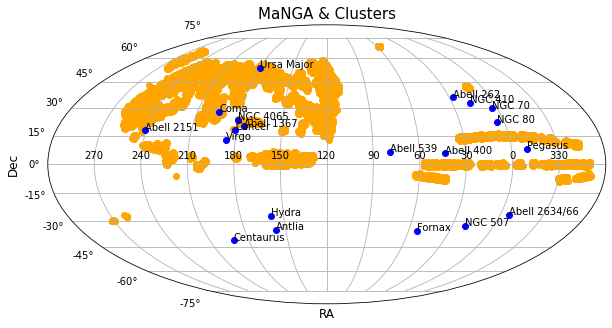

In [10]:
plot_mwd(coord[:,0],coord[:,1],drpallRA, drpallDec, name,org=120, title = 'MaNGA & Clusters')

# SGA Catalog

In [126]:
SGA = Table.read('/global/cfs/cdirs/cosmo/data/sga/2020/SGA-2020.fits', 'ELLIPSE')

SGA[:10]

SGA_ID,SGA_GALAXY,GALAXY,PGC,RA_LEDA,DEC_LEDA,MORPHTYPE,PA_LEDA,D25_LEDA,BA_LEDA,Z_LEDA,SB_D25_LEDA,MAG_LEDA,BYHAND,REF,GROUP_ID,GROUP_NAME,GROUP_MULT,GROUP_PRIMARY,GROUP_RA,GROUP_DEC,GROUP_DIAMETER,BRICKNAME,RA,DEC,D26,D26_REF,PA,BA,RA_MOMENT,DEC_MOMENT,SMA_MOMENT,G_SMA50,R_SMA50,Z_SMA50,SMA_SB22,SMA_SB22.5,SMA_SB23,SMA_SB23.5,SMA_SB24,SMA_SB24.5,SMA_SB25,SMA_SB25.5,SMA_SB26,G_MAG_SB22,R_MAG_SB22,Z_MAG_SB22,G_MAG_SB22.5,R_MAG_SB22.5,Z_MAG_SB22.5,G_MAG_SB23,R_MAG_SB23,Z_MAG_SB23,G_MAG_SB23.5,R_MAG_SB23.5,Z_MAG_SB23.5,G_MAG_SB24,R_MAG_SB24,Z_MAG_SB24,G_MAG_SB24.5,R_MAG_SB24.5,Z_MAG_SB24.5,G_MAG_SB25,R_MAG_SB25,Z_MAG_SB25,G_MAG_SB25.5,R_MAG_SB25.5,Z_MAG_SB25.5,G_MAG_SB26,R_MAG_SB26,Z_MAG_SB26,SMA_SB22_ERR,SMA_SB22.5_ERR,SMA_SB23_ERR,SMA_SB23.5_ERR,SMA_SB24_ERR,SMA_SB24.5_ERR,SMA_SB25_ERR,SMA_SB25.5_ERR,SMA_SB26_ERR,G_MAG_SB22_ERR,R_MAG_SB22_ERR,Z_MAG_SB22_ERR,G_MAG_SB22.5_ERR,R_MAG_SB22.5_ERR,Z_MAG_SB22.5_ERR,G_MAG_SB23_ERR,R_MAG_SB23_ERR,Z_MAG_SB23_ERR,G_MAG_SB23.5_ERR,R_MAG_SB23.5_ERR,Z_MAG_SB23.5_ERR,G_MAG_SB24_ERR,R_MAG_SB24_ERR,Z_MAG_SB24_ERR,G_MAG_SB24.5_ERR,R_MAG_SB24.5_ERR,Z_MAG_SB24.5_ERR,G_MAG_SB25_ERR,R_MAG_SB25_ERR,Z_MAG_SB25_ERR,G_MAG_SB25.5_ERR,R_MAG_SB25.5_ERR,Z_MAG_SB25.5_ERR,G_MAG_SB26_ERR,R_MAG_SB26_ERR,Z_MAG_SB26_ERR,G_COG_PARAMS_MTOT,G_COG_PARAMS_M0,G_COG_PARAMS_ALPHA1,G_COG_PARAMS_ALPHA2,G_COG_PARAMS_CHI2,R_COG_PARAMS_MTOT,R_COG_PARAMS_M0,R_COG_PARAMS_ALPHA1,R_COG_PARAMS_ALPHA2,R_COG_PARAMS_CHI2,Z_COG_PARAMS_MTOT,Z_COG_PARAMS_M0,Z_COG_PARAMS_ALPHA1,Z_COG_PARAMS_ALPHA2,Z_COG_PARAMS_CHI2,ELLIPSEBIT
int64,bytes16,bytes29,int64,float64,float64,bytes21,float32,float32,float32,float32,float32,float32,bool,bytes13,int64,bytes35,int16,bool,float64,float64,float32,bytes8,float64,float64,float32,bytes4,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32
2,SGA-2020 2,PGC1283207,1283207,228.3770865,5.4232017,S?,152.2,0.36307806,0.724436,0.03463229,23.40448,16.976,False,LEDA-20181114,0,PGC1283207,1,True,228.3770865,5.4232017,0.36307806,2283p055,228.3770803831908,5.423191398593787,0.49470574,SB26,158.20142,0.545691,228.37700918822188,5.4232652570544015,10.897086,3.3509698,3.1147978,3.240862,5.902337,6.9126143,7.941369,8.997992,10.073601,11.199986,12.391357,13.561038,14.841172,16.966799,16.108246,15.486356,16.879545,16.024958,15.400715,16.818878,15.967034,15.341793,16.776297,15.925804,15.300776,16.746685,15.897334,15.272053,16.725166,15.876816,15.2521105,16.708357,15.862035,15.237181,16.696539,15.851936,15.226998,16.689613,15.844313,15.21976,0.013392451,0.02354,0.021872982,0.01736985,0.024445537,0.039866067,0.05026544,0.08455789,0.122911856,0.005682776,0.0054258136,0.0049038026,0.005588406,0.005323561,0.0047632363,0.00543534,0.005177031,0.0046343105,0.0053025587,0.005040888,0.0045181247,0.005206092,0.0049438984,0.0044374703,0.0051483097,0.0048758644,0.0043834248,0.0051032505,0.0048264163,0.004344248,0.0050705094,0.004792021,0.004319857,0.005054293,0.004765629,0.0043044444,16.65942,0.34037337,0.2978292,3.0239506,0.07928849,15.820566,0.2640441,0.34559453,3.3033552,0.003811298,15.195567,0.29826432,0.3001073,3.2333765,0.011723555,0
3,SGA-2020 3,PGC1310416,1310416,202.54443750000002,6.9345944,Sc,159.26,0.4017908,0.7816278,0.073888786,23.498482,16.85,False,LEDA-20181114,1,PGC1310416,1,True,202.54443750000002,6.9345944,0.4017908,

## Cluster membership

Following Cosmicflows4 (Kourkchi et al. 2020), cluster membership is defined as
- $R_p < 1.5R_{2t}$ and $v < V_c \pm 3\sigma_p$
- $1.5R_{2t} \leq R_p < 3R_{2t}$ and $v < V_c \pm 2\sigma_p$

where $R_p$ is the projected distance from the cluster center, $R_{2t}$ is the cluster projected second turnaround radius, $\sigma_p$ is the projected velocity dispersion of the cluster, and $V_c$ is the average heliocentric radial velocity of the cluster.

#### Data Table 3 from Tully 2015

In [11]:
hdu = fits.open('DESI_SGA/TF/Tully15-Table3.fits')

In [12]:
table3 = Table(hdu[1].data)
hdu.close()

table3[:100]

f_Nest,Nest,Nmb,PGC1,SGLON,SGLAT,logLK,<Vcmba>,DM,sigV,R2t,sigP,Mlum,CF
int16,int32,int16,int32,float64,float64,float64,int32,float64,int16,float64,int16,float64,float64
1,100001,136,44715,89.6226,8.1461,13.15,7331,34.33,886,2.129,1045,1710000000000000.0,1.65
1,100002,197,41220,103.0008,-2.3248,12.69,1491,30.87,670,1.44,707,529000000000000.0,1.0
1,100003,113,43296,156.2336,-11.5868,12.75,3873,32.94,822,1.52,746,623000000000000.0,1.12
1,100004,81,58265,71.5103,49.7851,13.16,9424,34.87,740,2.153,1057,1770000000000000.0,2.26
1,100005,61,36487,92.0255,-10.495,12.78,6987,34.22,707,1.56,766,673000000000000.0,1.58
1,100006,85,31478,139.4478,-37.6063,12.48,4099,33.06,648,1.198,588,305000000000000.0,1.14
1,100007,86,56962,108.5182,49.0878,13.52,11603,35.32,1261,2.821,1385,3980000000000000.0,3.3
1,100008,65,39600,67.2953,3.239,11.94,1054,30.11,209,0.745,366,73300000000000.0,1.0
1,100009,66,59827,173.2412,43.415,13.13,9112,34.8,976,2.095,1029,1630000000000000.0,2.15


#### Data Table 2 from Tully et al. 2013

In [13]:
hdu = fits.open('DESI_SGA/TF/Tully13-Table2.fit')
table2 = Table(hdu[1].data)
hdu.close()

table2[:10]

_RAJ2000,_DEJ2000,N1,__Dist_,__DM_,__Err_,N2,GLON,GLAT,SGLON,SGLAT,GMT,__Bmag_,__Kmag_,__HV_,__GV_,__Vls_,__Vcmb_,__Vcmba_,sigma,__PV_,__PVa_,Group,Ng,_2M__,PGCb,GName,_2M,Simbad,NED,recno
float64,float64,int16,float64,float64,float64,int16,float64,float64,float64,float64,int16,float64,float64,int32,int32,int32,int32,int32,int16,int32,int32,int16,int16,int16,int32,str10,str2,str6,str3,int32
266.404996,-28.936172,16,0.01,14.5,0.02,20,0.0,0.0,185.7861,42.3103,1,-6.0,-9.0,51,26,13,91,91,64,90,90,223,16,0,17223,Galaxy,2M,Simbad,NED,1
15.693346,36.392682,39,0.76,24.4,0.01,41,125.479,-26.423,322.2989,9.4579,2,3.4,0.68,-213,-49,17,-485,-484,156,-541,-547,222,39,0,2557,NGC0224,2M,Simbad,NED,2
149.896678,-12.831016,4,1.37,25.68,0.03,4,251.1365,32.2601,120.502,-42.5472,10,9.75,9.29,347,153,103,690,691,23,589,589,227,4,0,29128,NGC003109,2M,Simbad,NED,3
139.011477,52.840941,1,1.37,25.68,0.1,1,164.6636,42.8855,47.6118,-15.0125,10,13.75,11.5,-29,17,45,130,130,0,28,28,0,579,0,26142,UGC4879,2M,Simbad,NED,4
243.448636,54.37081,1,1.91,26.41,0.08,1,83.8788,44.4092,56.0935,40.37,10,16.69,12.9,-139,44,78,-121,-120,0,-262,-268,230,1,0,2801026,KKR25,2M,Simbad,NED,5
34.06129,-34.616959,7,2.02,26.53,0.03,7,240.5522,-70.3721,254.5662,3.1429,4,7.64,5.94,90,72,71,-158,-157,30,-307,-311,234,7,0,1014,NGC000055,2M,Simbad,NED,6
171.882893,34.751309,4,2.26,26.77,0.04,4,184.7665,70.5101,100.4254,17.0085,10,13.67,11.7,179,194,172,427,427,34,259,259,229,4,0,50961,UGC9128,2M,Simbad,NED,7
266.788967,-64.639085,1,2.55,27.03,0.1,1,328.5515,-17.8494,199.1885,8.6107,10,11.52,9.45,306,188,130,323,323,0,133,133,244,1,0,60849,IC4662,2M,Simbad,NED,8
202.684924,54.911292,1,2.64,27.11,0.08,1,111.142,61.3082,63.09,17.9058,10,13.94,11.59,59,176,198,196,196,0,0,0,215,1,0,47495,UGC8508,2M,Simbad,NED,9


## Coma Cluster

In [14]:
Coma_nest = 100001

Coma_row_t3 = table3['Nest'] == Coma_nest

R2t_Coma = table3['R2t'][Coma_row_t3][0]
sigma_Coma = table3['sigP'][Coma_row_t3][0]

In [27]:
Coma_coords = SkyCoord(table3['SGLON'][Coma_row_t3]*u.degree, 
                       table3['SGLAT'][Coma_row_t3]*u.degree, 
                       frame='supergalactic')

group_coords = SkyCoord(table2['SGLON']*u.degree, 
                        table2['SGLAT']*u.degree, 
                        frame='supergalactic')

In [28]:
idx, d2d, d3d = Coma_coords.match_to_catalog_sky(group_coords)

V_Coma = table2['__HV_'][idx][0]

### Calculate the projected distance between the Coma cluster and each MaNGA galaxy

In [16]:
# First, we need to convert R2t from Mpc to an angle, using the group's heliocentric velocity
R2t_Coma_angle = (R2t_Coma/(V_Coma/H0))*u.radian

In [42]:
tf_coords = SkyCoord(drpall['objra'], drpall['objdec'], unit='deg')

sep = Coma_coords.separation(tf_coords)

Text(0, 0.5, 'Count')

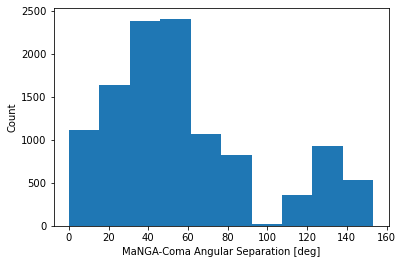

In [73]:
plt.hist(sep.to_value('degree'))
plt.xlabel('MaNGA-Coma Angular Separation [deg]')
plt.ylabel('Count')

In [53]:
MaNGA_in_Coma1 = (sep < 1.5*R2t_Coma_angle) & (drpall['z']*c > V_Coma - 3*sigma_Coma) & (drpall['z']*c < V_Coma + 3*sigma_Coma)

MaNGA_in_Coma2 = (sep >= 1.5*R2t_Coma_angle) & (sep < 3*R2t_Coma_angle) & (drpall['z']*c > V_Coma - 2*sigma_Coma) & (drpall['z']*c < V_Coma + 2*sigma_Coma)

MaNGA_in_Coma = MaNGA_in_Coma1 | MaNGA_in_Coma2

################################################################################
# Keep all instances of each SGA_ID that are within the Coma cluster
#-------------------------------------------------------------------------------
MaNGA_ID_in_Coma = np.unique(drpall['mangaid'][MaNGA_in_Coma])

idx_MaNGA_in_coma = np.in1d(drpall['mangaid'], MaNGA_ID_in_Coma)

inComa_MaNGA_table = drpall[idx_MaNGA_in_coma]
################################################################################

inComa_MaNGA_table

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag [7],nsa_elpetro_absmag [7],nsa_elpetro_amivar [7],nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction [7],nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux [7],nsa_petro_flux_ivar [7],nsa_elpetro_flux [7],nsa_elpetro_flux_ivar [7],nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux [7],nsa_sersic_flux_ivar [7]
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
11004,12701,11004-12701,1-456655,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,MaNGA,MaNGA dither,196.110590139,27.304313566,37.1573083168,87.1036097118,196.11059,27.304314,0.0126947,12,10800.9,0,19.8245,43.1267,ma079,22,3,11645,197.26642,26.300207,1.00522,1.034,1.10429,1.22997,1.50707,1.68136,0.386198,0.77714,0.912073,58575,58576,58576,2.52085,2.48709,2.48211,2.48468,1552,0,0,1,plateTargets-1.par,6155,J130426.67+271821.0,127,127,0,0.018372238,0.017881105,0.025483781,0.036609624,0.040862966,0.014217189,0.03072696,0.67973006,1.7889416,0.7438757,0.80211,-999.0,-999.0,0.7437902,0.46953073,0.49208066,157,5115,4,v1_0_1,482810,-999,0.018372238,0.018983964,-16.89632 .. -19.144066,-16.965324 .. -19.076622,569.68207 .. 558.8614,1587905200.0,1531813800.0,0.7180563,63.89447,0.10614801 .. 0.018937625,9.279935,8.08041,157.12498 .. 1207.631,0.2704583 .. 0.0006778203,168.62122 .. 1316.4143,0.26685238 .. 0.00076487375,0.6216933,1.756404,62.405457,10.606544,157.92967 .. 1400.5504,0.16473667 .. 0.004398549
11004,12702,11004-12702,1-522048,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,MaNGA,MaNGA dither,196.361826695,25.1910488195,2.06879176039,86.3077255362,196.36183,25.191049,0.0170195,12,10800.9,64,19.8245,43.1267,ma078,25,3,11645,197.26642,26.300207,1.00964,1.03809,1.10951,1.22997,1.50707,1.68136,0.386198,0.77714,0.912073,58575,58576,58576,2.45818,2.44997,2.47967,2.50454,1168,0,0,1,plateTargets-1.par,6155,J130526.84+251128.2,127,217,0,0.02370975,0.015756212,0.024231723,0.033780117,0.036954165,0.014978115,0.026620708,0.67973006,1.8756624,0.9774129,1.0392667,-999.0,-999.0,1.250808,0.77552605,0.8139643,276,5224,5,v1_0_1,551954,-999,0.02370975,0.023570111,-14.491968 .. -18.716969,-14.88619 .. -18.714146,6.9447656 .. 120.27312,2163911700.0,1725911800.0,0.20615898,99.89468,0.14426808 .. 0.02573854,11.698374,8.569049,13.488849 .. 637.3857,0.011948651 .. 0.00042041126,15.157334 .. 594.602,0.036034074 .. 0.00044969624,0.15,0.755315,100.13074,12.800695,10.619541 .. 595.78735,0.13114797 .. 0.0013952313
11004,12703,11004-12703,1-457076,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,MaNGA,MaNGA dither,195.871154137,26.5505176578,21.478879311,87.2514590442,195.87115,26.550518,0.0125891,12,10800.9,0,24.0048,43.812,ma174,31,3,11645,197.26642,26.3

Text(0, 0.5, 'Count')

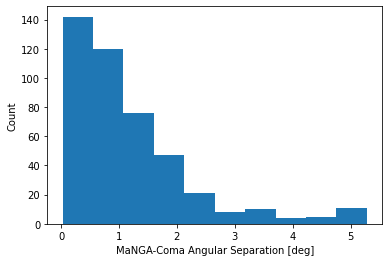

In [74]:
plt.hist(sep[MaNGA_in_Coma].to_value('degree'))
plt.xlabel('MaNGA-Coma Angular Separation [deg]')
plt.ylabel('Count')

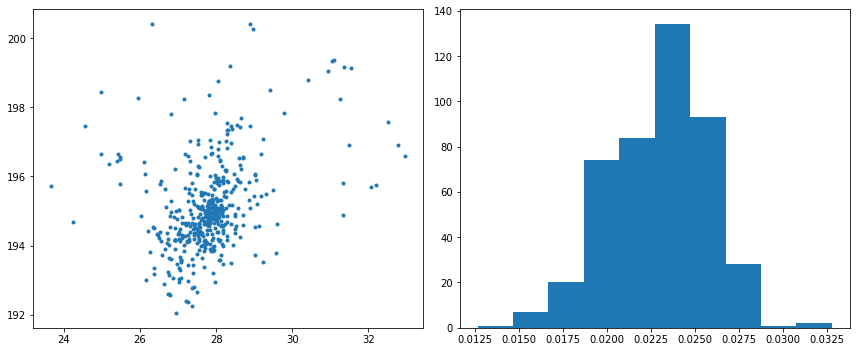

In [76]:
fig, axes = plt.subplots(1,2, figsize=(12,5), tight_layout=True)
ax = axes[0]
ax.plot(inComa_MaNGA_table['objdec'], inComa_MaNGA_table['objra'], '.')
ax = axes[1]
ax.hist(inComa_MaNGA_table['z']);

## Virgo Cluster

In [118]:
virgo_nest = 100002

virgo_row_t3 = table3['Nest'] == virgo_nest

R2t_virgo = table3['R2t'][virgo_row_t3][0]
sigma_virgo = table3['sigP'][virgo_row_t3][0]

In [119]:
virgo_coords = SkyCoord(table3['SGLON'][virgo_row_t3]*u.degree, 
                       table3['SGLAT'][virgo_row_t3]*u.degree, 
                       frame='supergalactic')

v_group_coords = SkyCoord(table2['SGLON']*u.degree, 
                        table2['SGLAT']*u.degree, 
                        frame='supergalactic')

idx, d2d, d3d = virgo_coords.match_to_catalog_sky(v_group_coords)

V_virgo = table2['__HV_'][idx][0]

In [120]:
# First, we need to convert R2t from Mpc to an angle, using the group's heliocentric velocity
R2t_virgo_angle = (R2t_virgo/(V_virgo/H0))*u.radian

In [121]:
v_tf_coords = SkyCoord(drpall['objra'], drpall['objdec'], unit='deg')

vsep = virgo_coords.separation(v_tf_coords)

Text(0, 0.5, 'Count')

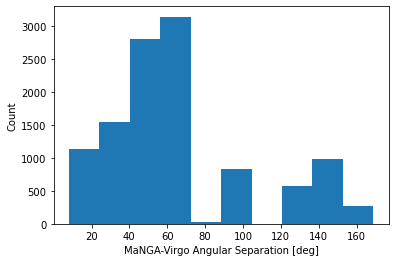

In [123]:
plt.hist(vsep.to_value('degree'))
plt.xlabel('MaNGA-Virgo Angular Separation [deg]')
plt.ylabel('Count')

In [122]:
MaNGA_in_virgo1 = (vsep < 1.5*R2t_virgo_angle) & (drpall['z']*c > V_virgo - 3*sigma_virgo) & (drpall['z']*c < V_virgo + 3*sigma_virgo)

MaNGA_in_virgo2 = (vsep >= 1.5*R2t_virgo_angle) & (vsep < 3*R2t_virgo_angle) & (drpall['z']*c > V_virgo - 2*sigma_virgo) & (drpall['z']*c < V_virgo + 2*sigma_virgo)

MaNGA_in_virgo = MaNGA_in_virgo1 | MaNGA_in_virgo2

################################################################################
# Keep all instances of each SGA_ID that are within the Coma cluster
#-------------------------------------------------------------------------------
MaNGA_ID_in_virgo = np.unique(drpall['mangaid'][MaNGA_in_virgo])

idx_MaNGA_in_virgo = np.in1d(drpall['mangaid'], MaNGA_ID_in_virgo)

inVirgo_MaNGA_table = drpall[idx_MaNGA_in_virgo]
################################################################################

inVirgo_MaNGA_table

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag [7],nsa_elpetro_absmag [7],nsa_elpetro_amivar [7],nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction [7],nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux [7],nsa_petro_flux_ivar [7],nsa_elpetro_flux [7],nsa_elpetro_flux_ivar [7],nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux [7],nsa_sersic_flux_ivar [7]
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
12483,9102,12483-9102,1-405438,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,186.453994751,33.5469017029,162.093602143,81.5331508757,186.45399,33.546902,0.01721,6,5400.45,4098,16.3636,29.5976,ma022,33,2,12782,186.19139,33.589684,1.02317,1.04653,1.06817,1.10526,1.29091,1.45921,0.765083,0.81324,0.818065,58928,58929,58929,2.52119,2.47127,2.43225,2.41408,0,0,16,1,plateTargets-1.par,6446,J122548.86+333248.7,91,-999,0,0.0010636672,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,109,4599,6,v1_0_1,428850,-999,0.0010636672,0.0019267546,-15.324541 .. -18.421743,-15.404062 .. -18.381721,624.59607 .. 875.3352,1179235100.0,1152443000.0,0.6917723,126.466835,0.14254883 .. 0.025431812,161.09877,88.44558,2412.135 .. 40069.973,0.11966102 .. 1.065575e-05,3806.4265 .. 68245.57,0.07866019 .. 1.044076e-06,0.6731956,1.476081,131.12589,159.75781,3536.6765 .. 70811.94,0.0663784 .. 6.8438526e-06


Text(0, 0.5, 'Count')

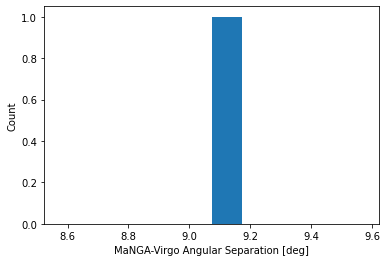

In [124]:
plt.hist(sep[MaNGA_in_virgo].to_value('degree'))
plt.xlabel('MaNGA-Virgo Angular Separation [deg]')
plt.ylabel('Count')

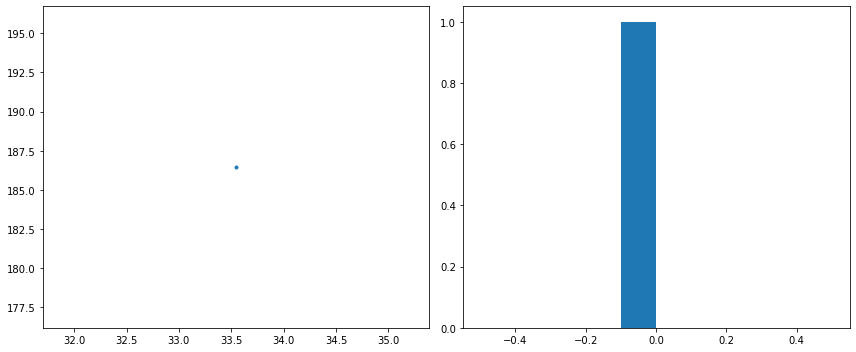

In [125]:
fig, axes = plt.subplots(1,2, figsize=(12,5), tight_layout=True)
ax = axes[0]
ax.plot(inVirgo_MaNGA_table['objdec'], inVirgo_MaNGA_table['objra'], '.')
ax = axes[1]
ax.hist(inVirgo_MaNGA_table['z']);

## Centaurus

In [25]:
cent_nest = 100003

cent_row_t3 = table3['Nest'] == cent_nest

R2t_cent = table3['R2t'][cent_row_t3][0]
sigma_cent = table3['sigP'][cent_row_t3][0]

In [26]:
cent_coords = SkyCoord(table3['SGLON'][cent_row_t3]*u.degree, 
                       table3['SGLAT'][cent_row_t3]*u.degree, 
                       frame='supergalactic')

c_group_coords = SkyCoord(table2['SGLON']*u.degree, 
                        table2['SGLAT']*u.degree, 
                        frame='supergalactic')

idx, d2d, d3d = cent_coords.match_to_catalog_sky(c_group_coords)

V_cent = table2['__HV_'][idx][0]

In [27]:
# First, we need to convert R2t from Mpc to an angle, using the group's heliocentric velocity
R2t_cent_angle = (R2t_cent/(V_cent/H0))*u.radian

In [28]:
c_tf_coords = SkyCoord(drpall['objra'], drpall['objdec'], unit='deg')

csep = cent_coords.separation(c_tf_coords)

In [29]:
MaNGA_in_cent1 = (csep < 1.5*R2t_cent_angle) & (drpall['z']*c > V_cent - 3*sigma_cent) & (drpall['z']*c < V_cent + 3*sigma_cent)

MaNGA_in_cent2 = (csep >= 1.5*R2t_cent_angle) & (csep < 3*R2t_cent_angle) & (drpall['z']*c > V_cent - 2*sigma_cent) & (drpall['z']*c < V_cent + 2*sigma_cent)

MaNGA_in_cent = MaNGA_in_cent1 | MaNGA_in_cent2

################################################################################
# Keep all instances of each SGA_ID that are within the Coma cluster
#-------------------------------------------------------------------------------
MaNGA_ID_in_cent = np.unique(drpall['mangaid'][MaNGA_in_cent])

idx_MaNGA_in_cent = np.in1d(drpall['mangaid'], MaNGA_ID_in_cent)

inCentaurus_MaNGA_table = drpall[idx_MaNGA_in_cent]
################################################################################

inCentaurus_MaNGA_table

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag [7],nsa_elpetro_absmag [7],nsa_elpetro_amivar [7],nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction [7],nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux [7],nsa_petro_flux_ivar [7],nsa_elpetro_flux [7],nsa_elpetro_flux_ivar [7],nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux [7],nsa_sersic_flux_ivar [7]
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


## Abell 1367

In [30]:
a1367_nest = 100005

a1367_row_t3 = table3['Nest'] == a1367_nest

R2t_a1367 = table3['R2t'][a1367_row_t3][0]
sigma_a1367 = table3['sigP'][a1367_row_t3][0]

In [31]:
a1367_coords = SkyCoord(table3['SGLON'][a1367_row_t3]*u.degree, 
                       table3['SGLAT'][a1367_row_t3]*u.degree, 
                       frame='supergalactic')

a1367_group_coords = SkyCoord(table2['SGLON']*u.degree, 
                        table2['SGLAT']*u.degree, 
                        frame='supergalactic')

idx, d2d, d3d = a1367_coords.match_to_catalog_sky(a1367_group_coords)

V_a1367 = table2['__HV_'][idx][0]

In [32]:
# First, we need to convert R2t from Mpc to an angle, using the group's heliocentric velocity
R2t_a1367_angle = (R2t_a1367/(V_a1367/H0))*u.radian

In [33]:
a1367_tf_coords = SkyCoord(drpall['objra'], drpall['objdec'], unit='deg')

a13sep = a1367_coords.separation(a1367_tf_coords)

In [34]:
MaNGA_in_a13671 = (a13sep < 1.5*R2t_a1367_angle) & (drpall['z']*c > V_a1367 - 3*sigma_a1367) & (drpall['z']*c < V_a1367 + 3*sigma_a1367)

MaNGA_in_a13672 = (a13sep >= 1.5*R2t_a1367_angle) & (a13sep < 3*R2t_a1367_angle) & (drpall['z']*c > V_a1367 - 2*sigma_a1367) & (drpall['z']*c < V_a1367 + 2*sigma_a1367)

MaNGA_in_a1367 = MaNGA_in_a13671 | MaNGA_in_a13672

################################################################################
# Keep all instances of each SGA_ID that are within the Coma cluster
#-------------------------------------------------------------------------------
MaNGA_ID_in_a1367 = np.unique(drpall['mangaid'][MaNGA_in_a1367])

idx_MaNGA_in_a1367 = np.in1d(drpall['mangaid'], MaNGA_ID_in_a1367)

inAbell1367_MaNGA_table = drpall[idx_MaNGA_in_a1367]
################################################################################

inAbell1367_MaNGA_table

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag [7],nsa_elpetro_absmag [7],nsa_elpetro_amivar [7],nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction [7],nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux [7],nsa_petro_flux_ivar [7],nsa_elpetro_flux [7],nsa_elpetro_flux_ivar [7],nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux [7],nsa_sersic_flux_ivar [7]
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


## Abell 539

In [35]:
a539_nest = 200017

a539_row_t3 = table3['Nest'] == a539_nest

R2t_a539 = table3['R2t'][a539_row_t3][0]
sigma_a539 = table3['sigP'][a539_row_t3][0]

In [36]:
a539_coords = SkyCoord(table3['SGLON'][a539_row_t3]*u.degree, 
                       table3['SGLAT'][a539_row_t3]*u.degree, 
                       frame='supergalactic')

a539_group_coords = SkyCoord(table2['SGLON']*u.degree, 
                        table2['SGLAT']*u.degree, 
                        frame='supergalactic')

idx, d2d, d3d = a539_coords.match_to_catalog_sky(a539_group_coords)

V_a539 = table2['__HV_'][idx][0]

In [37]:
# First, we need to convert R2t from Mpc to an angle, using the group's heliocentric velocity
R2t_a539_angle = (R2t_a539/(V_a539/H0))*u.radian

In [38]:
a539_tf_coords = SkyCoord(drpall['objra'], drpall['objdec'], unit='deg')

a5sep = a539_coords.separation(a539_tf_coords)

In [39]:
MaNGA_in_a5391 = (a5sep < 1.5*R2t_a539_angle) & (drpall['z']*c > V_a539 - 3*sigma_a539) & (drpall['z']*c < V_a539 + 3*sigma_a539)

MaNGA_in_a5392 = (a5sep >= 1.5*R2t_a539_angle) & (a5sep < 3*R2t_a539_angle) & (drpall['z']*c > V_a539 - 2*sigma_a539) & (drpall['z']*c < V_a539 + 2*sigma_a539)

MaNGA_in_a539 = MaNGA_in_a5391 | MaNGA_in_a5392

################################################################################
# Keep all instances of each SGA_ID that are within the Coma cluster
#-------------------------------------------------------------------------------
MaNGA_ID_in_a539 = np.unique(drpall['mangaid'][MaNGA_in_a539])

idx_MaNGA_in_a539 = np.in1d(drpall['mangaid'], MaNGA_ID_in_a539)

inAbell539_MaNGA_table = drpall[idx_MaNGA_in_a539]
################################################################################

inAbell539_MaNGA_table

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag [7],nsa_elpetro_absmag [7],nsa_elpetro_amivar [7],nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction [7],nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux [7],nsa_petro_flux_ivar [7],nsa_elpetro_flux [7],nsa_elpetro_flux_ivar [7],nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux [7],nsa_sersic_flux_ivar [7]
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


## Abell 2634

In [40]:
a2634_nest = 200016

a2634_row_t3 = table3['Nest'] == a2634_nest

R2t_a2634 = table3['R2t'][a2634_row_t3][0]
sigma_a2634 = table3['sigP'][a2634_row_t3][0]

In [41]:
a2634_coords = SkyCoord(table3['SGLON'][a2634_row_t3]*u.degree, 
                       table3['SGLAT'][a2634_row_t3]*u.degree, 
                       frame='supergalactic')

a2634_group_coords = SkyCoord(table2['SGLON']*u.degree, 
                        table2['SGLAT']*u.degree, 
                        frame='supergalactic')

idx, d2d, d3d = a2634_coords.match_to_catalog_sky(a2634_group_coords)

V_a2634 = table2['__HV_'][idx][0]

In [42]:
# First, we need to convert R2t from Mpc to an angle, using the group's heliocentric velocity
R2t_a2634_angle = (R2t_a2634/(V_a2634/H0))*u.radian

In [43]:
a2634_tf_coords = SkyCoord(drpall['objra'], drpall['objdec'], unit='deg')

a2sep = a2634_coords.separation(a2634_tf_coords)

In [44]:
MaNGA_in_a26341 = (a2sep < 1.5*R2t_a2634_angle) & (drpall['z']*c > V_a2634 - 3*sigma_a2634) & (drpall['z']*c < V_a2634 + 3*sigma_a2634)

MaNGA_in_a26342 = (a2sep >= 1.5*R2t_a2634_angle) & (a2sep < 3*R2t_a2634_angle) & (drpall['z']*c > V_a2634 - 2*sigma_a2634) & (drpall['z']*c < V_a2634 + 2*sigma_a2634)

MaNGA_in_a2634 = MaNGA_in_a26341 | MaNGA_in_a26342

################################################################################
# Keep all instances of each SGA_ID that are within the Coma cluster
#-------------------------------------------------------------------------------
MaNGA_ID_in_a2634 = np.unique(drpall['mangaid'][MaNGA_in_a2634])

idx_MaNGA_in_a2634 = np.in1d(drpall['mangaid'], MaNGA_ID_in_a2634)

inAbell2634_MaNGA_table = drpall[idx_MaNGA_in_a2634]
################################################################################

inAbell2634_MaNGA_table

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag [7],nsa_elpetro_absmag [7],nsa_elpetro_amivar [7],nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction [7],nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux [7],nsa_petro_flux_ivar [7],nsa_elpetro_flux [7],nsa_elpetro_flux_ivar [7],nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux [7],nsa_sersic_flux_ivar [7]
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


## Ursa Major

In [94]:
ursa_nest = 100008

ursa_row_t3 = table3['Nest'] == ursa_nest

R2t_ursa = table3['R2t'][ursa_row_t3][0]
sigma_ursa = table3['sigP'][ursa_row_t3][0]

In [95]:
ursa_coords = SkyCoord(table3['SGLON'][ursa_row_t3]*u.degree, 
                       table3['SGLAT'][ursa_row_t3]*u.degree, 
                       frame='supergalactic')

ursa_group_coords = SkyCoord(table2['SGLON']*u.degree, 
                        table2['SGLAT']*u.degree, 
                        frame='supergalactic')

idx, d2d, d3d = ursa_coords.match_to_catalog_sky(ursa_group_coords)

V_ursa = table2['__HV_'][idx][0]

In [96]:
# First, we need to convert R2t from Mpc to an angle, using the group's heliocentric velocity
R2t_ursa_angle = (R2t_ursa/(V_ursa/H0))*u.radian

In [97]:
ursa_tf_coords = SkyCoord(drpall['objra'], drpall['objdec'], unit='deg')

usep = ursa_coords.separation(ursa_tf_coords)

Text(0, 0.5, 'Count')

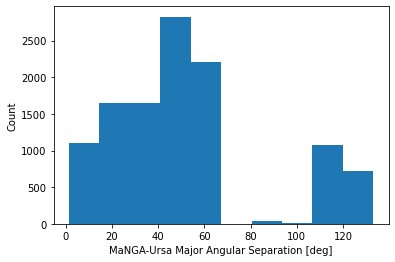

In [101]:
plt.hist(usep.to_value('degree'))
plt.xlabel('MaNGA-Ursa Major Angular Separation [deg]')
plt.ylabel('Count')

In [99]:
MaNGA_in_ursa1 = (usep < 1.5*R2t_ursa_angle) & (drpall['z']*c > V_ursa - 3*sigma_ursa) & (drpall['z']*c < V_ursa + 3*sigma_ursa)

MaNGA_in_ursa2 = (usep >= 1.5*R2t_ursa_angle) & (usep < 3*R2t_ursa_angle) & (drpall['z']*c > V_ursa - 2*sigma_ursa) & (drpall['z']*c < V_ursa + 2*sigma_ursa)

MaNGA_in_ursa = MaNGA_in_ursa1 | MaNGA_in_ursa2

################################################################################
# Keep all instances of each SGA_ID that are within the Coma cluster
#-------------------------------------------------------------------------------
MaNGA_ID_in_ursa = np.unique(drpall['mangaid'][MaNGA_in_ursa])

idx_MaNGA_in_ursa = np.in1d(drpall['mangaid'], MaNGA_ID_in_ursa)

inUrsaMajor_MaNGA_table = drpall[idx_MaNGA_in_ursa]
################################################################################

inUrsaMajor_MaNGA_table

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag [7],nsa_elpetro_absmag [7],nsa_elpetro_amivar [7],nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction [7],nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux [7],nsa_petro_flux_ivar [7],nsa_elpetro_flux [7],nsa_elpetro_flux_ivar [7],nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux [7],nsa_sersic_flux_ivar [7]
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
10507,1902,10507-1902,59-76,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,176.525541667,47.4820555556,150.747573852,65.9636699425,176.52554,47.482056,0.0231925,9,8100.74,0,26.0313,39.8483,ma083,35,4,11039,176.27449,48.349503,1.03995,1.05894,1.0919,1.18304,1.26102,1.57627,0.785784,0.896865,0.905111,58136,58136,58137,2.52789,2.49659,2.48287,2.46467,0,0,4194304,59,plateTargets-59.par,7091,-9999,19,-999,0,0.00302,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999,-9999,-9999,-9999,-9999.0,-9999.0,-9999.0 .. -9999.0,-9999.0 .. -9999.0,-9999.0 .. -9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0 .. -9999.0,-9999.0,-9999.0,-9999.0 .. -9999.0,-9999.0 .. -9999.0,-9999.0 .. -9999.0,-9999.0 .. -9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0 .. -9999.0,-9999.0 .. -9999.0
10510,12704,10510-12704,1-189584,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,179.117267145,55.1252090259,138.830321339,60.273997444,179.11727,55.125209,0.0141217,9,8100.71,0,28.6474,52.5498,ma150,34,4,11042,179.41353,54.868313,1.09612,1.12125,1.14555,1.22898,1.49384,1.68693,0.920243,0.92669,0.944608,58138,58142,58145,2.59012,2.5336,2.48261,2.43882,0,0,65552,1,plateTargets-1.par,7131,J115628.13+550730.8,127,-999,0,0.00371352,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,180,2821,4,v1_0_1,200397,-999,0.00371352,0.00472056,-16.4647 .. -19.9207,-16.3787 .. -19.7885,0.0 .. 1106.19,5436740000.0,4642670000.0,0.875364,11.1973,0.116754 .. 0.0208298,17.9889,16.8591,0.0 .. 42482.7,0.0 .. 0.000170057,0.0 .. 41511.1,0.0 .. 0.000170834,0.86862,0.882304,12.4624,18.8117,0.0 .. 46849.1,0.0162911 .. 0.000542761
11750,1901,11750-1901,54-59,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,190.387541667,41.1516388889,130.555547125,75.830039745,190.38754,41.151639,0.0213262,12,10801.1,16384,24.1085,48.9305,ma060-ma106,29,3-5,12027,189.87985,40.515266,1.01081,1.06289,1.12194,1.33843,1.48327,1.66865,0.607427,0.872145,0.923509,58549,58549,58567,2.56817,2.5649,2.53927,2.51338,0,0,4194304,54,plateTargets-54.par,6433,-9999,19,-999,0,0.0018,-9999.0,-9999.0,-9999.0,-

Text(0, 0.5, 'Count')

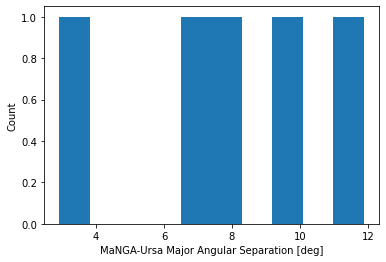

In [100]:
plt.hist(usep[MaNGA_in_ursa].to_value('degree'))
plt.xlabel('MaNGA-Ursa Major Angular Separation [deg]')
plt.ylabel('Count')

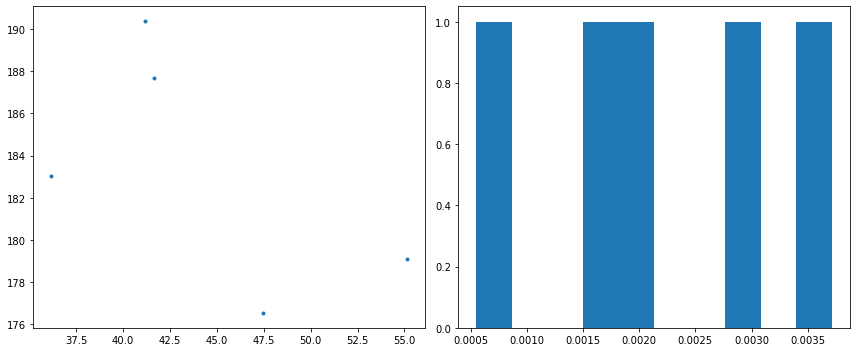

In [102]:
fig, axes = plt.subplots(1,2, figsize=(12,5), tight_layout=True)
ax = axes[0]
ax.plot(inUrsaMajor_MaNGA_table['objdec'], inUrsaMajor_MaNGA_table['objra'], '.')
ax = axes[1]
ax.hist(inUrsaMajor_MaNGA_table['z']);

## Abell 2151

In [62]:
a2151_nest = 100007

a2151_row_t3 = table3['Nest'] == a2151_nest

R2t_a2151 = table3['R2t'][a2151_row_t3][0]
sigma_a2151 = table3['sigP'][a2151_row_t3][0]

In [63]:
a2151_coords = SkyCoord(table3['SGLON'][a2151_row_t3]*u.degree, 
                       table3['SGLAT'][a2151_row_t3]*u.degree, 
                       frame='supergalactic')

a2151_group_coords = SkyCoord(table2['SGLON']*u.degree, 
                        table2['SGLAT']*u.degree, 
                        frame='supergalactic')

idx, d2d, d3d = a2151_coords.match_to_catalog_sky(a2151_group_coords)

V_a2151 = table2['__HV_'][idx][0]

In [64]:
# First, we need to convert R2t from Mpc to an angle, using the group's heliocentric velocity
R2t_a2151_angle = (R2t_a2151/(V_a2151/H0))*u.radian

In [65]:
a2151_tf_coords = SkyCoord(drpall['objra'], drpall['objdec'], unit='deg')

a21sep = a2151_coords.separation(a2151_tf_coords)

Text(0, 0.5, 'Count')

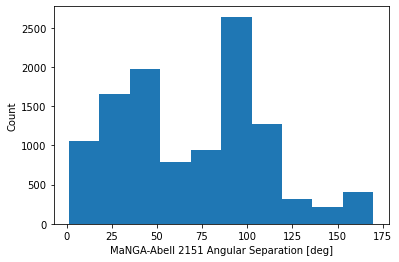

In [89]:
plt.hist(a21sep.to_value('degree'))
plt.xlabel('MaNGA-Abell 2151 Angular Separation [deg]')
plt.ylabel('Count')

In [91]:
MaNGA_in_a21511 = (a21sep < 1.5*R2t_a2151_angle) & (drpall['z']*c > V_a2151 - 3*sigma_a2151) & (drpall['z']*c < V_a2151 + 3*sigma_a2151)

MaNGA_in_a21512 = (a21sep >= 1.5*R2t_a2151_angle) & (a21sep < 3*R2t_a2151_angle) & (drpall['z']*c > V_a2151 - 2*sigma_a2151) & (drpall['z']*c < V_a2151 + 2*sigma_a2151)

MaNGA_in_a2151 = MaNGA_in_a21511 | MaNGA_in_a21512

################################################################################
# Keep all instances of each SGA_ID that are within the Coma cluster
#-------------------------------------------------------------------------------
MaNGA_ID_in_a2151 = np.unique(drpall['mangaid'][MaNGA_in_a2151])

idx_MaNGA_in_a2151 = np.in1d(drpall['mangaid'], MaNGA_ID_in_a2151)

inAbell2151_MaNGA_table = drpall[idx_MaNGA_in_a2151]
################################################################################

inAbell2151_MaNGA_table

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag [7],nsa_elpetro_absmag [7],nsa_elpetro_amivar [7],nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction [7],nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux [7],nsa_petro_flux_ivar [7],nsa_elpetro_flux [7],nsa_elpetro_flux_ivar [7],nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux [7],nsa_sersic_flux_ivar [7]
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
11976,12701,11976-12701,1-545967,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,241.468442331,18.2204981694,32.2805128075,44.5495690978,241.46844,18.220498,0.0526269,12,10800.8,4096,21.2698,48.927,ma126,22,6,12257,242.95091,18.622717,1.03322,1.05519,1.11078,1.09304,1.27429,1.36164,0.705103,0.860022,0.882643,59011,59016,59016,2.43774,2.46349,2.4866,2.50483,1040,0,0,1,plateTargets-1.par,7584,J160552.42+181313.7,127,169,0,0.035793338,0.028021477,0.041503645,0.061424445,0.06736172,0.027799748,0.042533673,0.67973006,0.39712077,0.18291175,0.19604881,-999.0,-999.0,0.35482377,0.17339161,0.18515277,91,4671,1,v1_0_1,577318,-999,0.035793338,0.03592137,-16.385899 .. -22.131243,-16.790493 .. -21.655771,9.28001 .. 1080.7552,55303570000.0,35909284000.0,0.4261119,118.26187,0.43668082 .. 0.07790723,11.108309,8.098305,26.869528 .. 3113.4243,0.012317556 .. 0.0012462651,29.135294 .. 3578.4148,0.013081428 .. 0.0036417716,0.34659883,4.976387,117.53204,21.059978,20.359644 .. 5485.7646,0.056891896 .. 0.010816837
11976,12702,11976-12702,1-594224,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,241.46822,18.46477,32.6020235741,44.6347068948,241.46822,18.46477,0.0435292,12,10800.8,4096,21.2698,48.927,ma134,25,6,12257,242.95091,18.622717,1.03209,1.05398,1.10935,1.09304,1.27429,1.36164,0.705103,0.860022,0.882643,59011,59016,59016,2.48158,2.39396,2.38125,2.38463,2080,0,0,1,plateTargets-1.par,7584,J160552.20+182758.0,127,169,0,0.03889418,0.019060029,0.02626629,0.03826524,0.042490978,0.019060029,0.02626629,0.7828951,-999.0,0.66665864,0.6998553,1.0829474,1.1733583,-999.0,0.66686755,0.7000856,310,4646,5,v1_0_1,633102,-999,0.03889418,0.039025657,-15.713459 .. -19.305902,-16.645823 .. -19.18719,20.5723 .. 46.170174,2917191400.0,2392771300.0,0.52335185,112.17883,0.3601176 .. 0.064247765,6.5067115,5.1302195,13.7681265 .. 324.91376,0.05464492 .. 0.00051991997,22.188778 .. 320.6385,0.050933138 .. 0.0005523455,0.4536838,0.7146275,111.81351,6.9276233,8.971009 .. 358.8479,0.13107067 .. 0.004750963
11976,12703,11976-12703,1-446242,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,243.925554082,19.6375787771,35.2152307933,42.8439043806,243.92555,19.637579,0.0486936,9,8100.59,4098,17.6

Text(0, 0.5, 'Count')

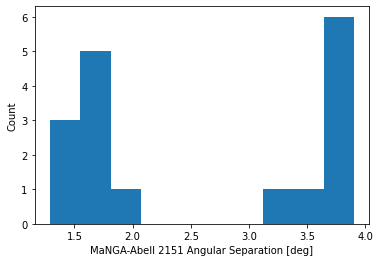

In [92]:
plt.hist(a21sep[MaNGA_in_a2151].to_value('degree'))
plt.xlabel('MaNGA-Abell 2151 Angular Separation [deg]')
plt.ylabel('Count')

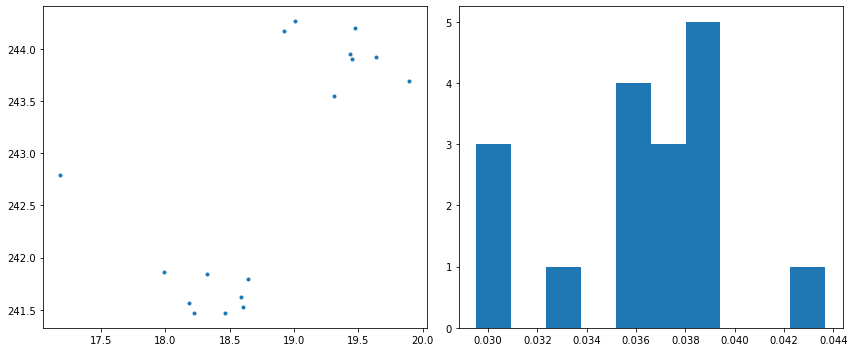

In [93]:
fig, axes = plt.subplots(1,2, figsize=(12,5), tight_layout=True)
ax = axes[0]
ax.plot(inAbell2151_MaNGA_table['objdec'], inAbell2151_MaNGA_table['objra'], '.')
ax = axes[1]
ax.hist(inAbell2151_MaNGA_table['z']);

## NGC 4065

In [108]:
ngc4065_nest = 100018

ngc4065_row_t3 = table3['Nest'] == ngc4065_nest

R2t_ngc4065 = table3['R2t'][ngc4065_row_t3][0]
sigma_ngc4065 = table3['sigP'][ngc4065_row_t3][0]

In [109]:
ngc4065_coords = SkyCoord(table3['SGLON'][ngc4065_row_t3]*u.degree, 
                       table3['SGLAT'][ngc4065_row_t3]*u.degree, 
                       frame='supergalactic')

ngc4065_group_coords = SkyCoord(table2['SGLON']*u.degree, 
                        table2['SGLAT']*u.degree, 
                        frame='supergalactic')

idx, d2d, d3d = ngc4065_coords.match_to_catalog_sky(ngc4065_group_coords)

V_ngc4065 = table2['__HV_'][idx][0]

In [110]:
# First, we need to convert R2t from Mpc to an angle, using the group's heliocentric velocity
R2t_ngc4065_angle = (R2t_ngc4065/(V_ngc4065/H0))*u.radian

In [111]:
ngc4065_tf_coords = SkyCoord(drpall['objra'], drpall['objdec'], unit='deg')

ngc40sep = ngc4065_coords.separation(ngc4065_tf_coords)

Text(0, 0.5, 'Count')

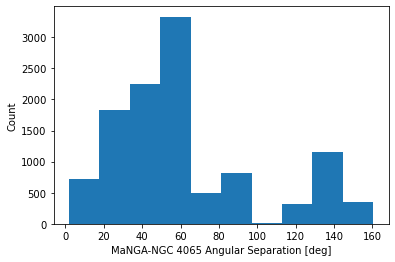

In [113]:
plt.hist(ngc40sep.to_value('degree'))
plt.xlabel('MaNGA-NGC 4065 Angular Separation [deg]')
plt.ylabel('Count')

In [115]:
MaNGA_in_ngc40651 = (ngc40sep < 1.5*R2t_ngc4065_angle) & (drpall['z']*c > V_ngc4065 - 3*sigma_ngc4065) & (drpall['z']*c < V_ngc4065 + 3*sigma_ngc4065)

MaNGA_in_ngc40652 = (ngc40sep >= 1.5*R2t_ngc4065_angle) & (ngc40sep < 3*R2t_ngc4065_angle) & (drpall['z']*c > V_ngc4065 - 2*sigma_ngc4065) & (drpall['z']*c < V_ngc4065 + 2*sigma_ngc4065)

MaNGA_in_ngc4065 = MaNGA_in_ngc40651 | MaNGA_in_ngc40652

################################################################################
# Keep all instances of each SGA_ID that are within the Coma cluster
#-------------------------------------------------------------------------------
MaNGA_ID_in_ngc4065 = np.unique(drpall['mangaid'][MaNGA_in_ngc4065])

idx_MaNGA_in_ngc4065 = np.in1d(drpall['mangaid'], MaNGA_ID_in_ngc4065)

inNGC4065_MaNGA_table = drpall[idx_MaNGA_in_ngc4065]
################################################################################

inNGC4065_MaNGA_table

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag [7],nsa_elpetro_absmag [7],nsa_elpetro_amivar [7],nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction [7],nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux [7],nsa_petro_flux_ivar [7],nsa_elpetro_flux [7],nsa_elpetro_flux_ivar [7],nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux [7],nsa_sersic_flux_ivar [7]
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
8310,12702,8310-12702,1-494684,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,178.474223049,22.0356704467,231.08670667,75.9742739547,178.47422,22.03567,0.0315981,12,10800.8,0,22.3921,52.9649,ma134,25,6,8823,179.27495,22.686079,1.01827,1.0317,1.08563,1.13453,1.35004,1.49692,0.610029,0.844181,0.900027,58581,58582,58582,2.36733,2.37893,2.38392,2.38578,1168,0,0,1,plateTargets-1.par,6137,J115353.79+220208.3,127,91,127,0.0255917,0.0191029,0.0262964,0.0383271,0.0425522,0.0158404,0.0313921,0.67973,1.72735,0.69915,0.755623,-999.0,-999.0,0.720715,0.446649,0.469043,423,5194,3,v1_0_1,523092,-999,0.0255917,0.0253246,-14.0272 .. -19.7547,-13.8064 .. -19.4988,0.210208 .. 864.938,5907900000.0,5150100000.0,0.513016,29.5659,0.260249 .. 0.0464305,7.82651,6.39049,5.34615 .. 965.55,0.00966711 .. 0.00301093,4.43093 .. 1039.83,0.0126257 .. 0.00425627,0.364637,2.04622,31.404,10.1472,5.26348 .. 1301.92,0.044326 .. 0.0151345
8310,12705,8310-12705,1-495360,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,179.561883968,21.8997431582,233.43078982,76.8301614093,179.56188,21.899743,0.0298429,12,10800.8,0,26.2984,50.27,ma175,36,6,8823,179.27495,22.686079,1.01847,1.02945,1.07963,1.13453,1.35004,1.49692,0.610029,0.844181,0.900027,58581,58582,58582,2.45466,2.37887,2.35707,2.33681,1168,0,64,1,plateTargets-1.par,6137,J115814.84+215359.2,127,61,0,0.0206257,0.0137258,0.0231398,0.0311729,0.0297754,0.0137258,0.0265428,0.67973,1.96833,1.96833,1.96833,-999.0,-999.0,1.20152,1.20152,1.20152,315,5183,2,v1_0_1,523788,-999,0.0206257,0.0205375,-13.4451 .. -18.3523,-13.8705 .. -18.2641,1.2237 .. 644.695,1272590000.0,1023290000.0,0.407376,27.8682,0.241588 .. 0.0431011,5.98558,4.54868,4.5681 .. 511.523,0.024586 .. 0.00512595,6.95892 .. 506.79,0.0298463 .. 0.00704906,0.215343,1.3265,27.5347,7.23272,4.84516 .. 548.246,0.108144 .. 0.0378355


Text(0, 0.5, 'Count')

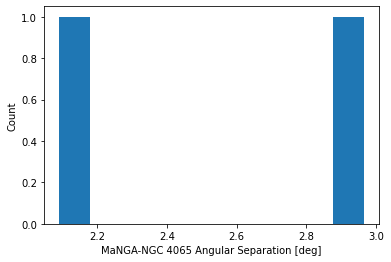

In [116]:
plt.hist(ngc40sep[MaNGA_in_ngc4065].to_value('degree'))
plt.xlabel('MaNGA-NGC 4065 Angular Separation [deg]')
plt.ylabel('Count')

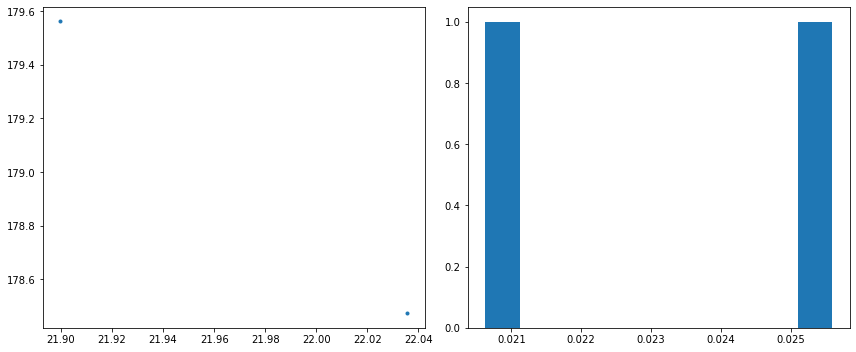

In [117]:
fig, axes = plt.subplots(1,2, figsize=(12,5), tight_layout=True)
ax = axes[0]
ax.plot(inNGC4065_MaNGA_table['objdec'], inNGC4065_MaNGA_table['objra'], '.')
ax = axes[1]
ax.hist(inNGC4065_MaNGA_table['z']);

## Cancer

In [78]:
cancer_nest = 100030

cancer_row_t3 = table3['Nest'] == cancer_nest

R2t_cancer = table3['R2t'][cancer_row_t3][0]
sigma_cancer = table3['sigP'][cancer_row_t3][0]

In [79]:
cancer_coords = SkyCoord(table3['SGLON'][cancer_row_t3]*u.degree, 
                       table3['SGLAT'][cancer_row_t3]*u.degree, 
                       frame='supergalactic')

cancer_group_coords = SkyCoord(table2['SGLON']*u.degree, 
                        table2['SGLAT']*u.degree, 
                        frame='supergalactic')

idx, d2d, d3d = cancer_coords.match_to_catalog_sky(cancer_group_coords)

V_cancer = table2['__HV_'][idx][0]

In [80]:
# First, we need to convert R2t from Mpc to an angle, using the group's heliocentric velocity
R2t_cancer_angle = (R2t_cancer/(V_cancer/H0))*u.radian

In [81]:
cancer_tf_coords = SkyCoord(drpall['objra'], drpall['objdec'], unit='deg')

cancersep = cancer_coords.separation(cancer_tf_coords)

Text(0, 0.5, 'Count')

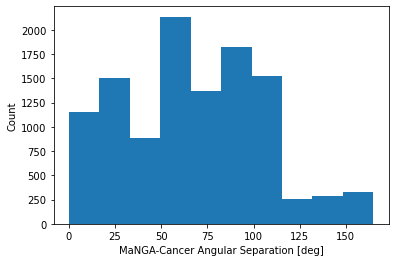

In [88]:
plt.hist(cancersep.to_value('degree'))
plt.xlabel('MaNGA-Cancer Angular Separation [deg]')
plt.ylabel('Count')

In [83]:
MaNGA_in_cancer1 = (cancersep < 1.5*R2t_cancer_angle) & (drpall['z']*c > V_cancer - 3*sigma_cancer) & (drpall['z']*c < V_cancer + 3*sigma_cancer)

MaNGA_in_cancer2 = (cancersep >= 1.5*R2t_cancer_angle) & (cancersep < 3*R2t_cancer_angle) & (drpall['z']*c > V_cancer - 2*sigma_cancer) & (drpall['z']*c < V_cancer + 2*sigma_cancer)

MaNGA_in_cancer = MaNGA_in_cancer1 | MaNGA_in_cancer2

################################################################################
# Keep all instances of each SGA_ID that are within the Coma cluster
#-------------------------------------------------------------------------------
MaNGA_ID_in_cancer = np.unique(drpall['mangaid'][MaNGA_in_cancer])

idx_MaNGA_in_cancer = np.in1d(drpall['mangaid'], MaNGA_ID_in_cancer)

inCancer_MaNGA_table = drpall[idx_MaNGA_in_cancer]
################################################################################

inCancer_MaNGA_table

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag [7],nsa_elpetro_absmag [7],nsa_elpetro_amivar [7],nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction [7],nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux [7],nsa_petro_flux_ivar [7],nsa_elpetro_flux [7],nsa_elpetro_flux_ivar [7],nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux [7],nsa_sersic_flux_ivar [7]
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
10219,12701,10219-12701,1-384262,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,124.804460255,20.757476218,202.730852366,28.2045405067,124.80446,20.757476,0.0485511,9,8100.75,0,20.0905,41.3611,ma087,22,4,10676,125.1591,22.126518,1.02295,1.03572,1.08994,1.22475,1.36205,1.53061,0.939331,0.950341,0.956134,58107,58107,58107,2.52212,2.54318,2.55236,2.56663,4096,0,0,1,plateTargets-1.par,6647,J081913.06+204526.9,127,271,0,0.016806,0.0191604,0.0263371,0.0384104,0.0426346,0.0172462,0.0279859,0.67973,-999.0,-999.0,-999.0,-999.0,-999.0,1.15538,0.581344,0.620021,107,6728,4,v1_0_1,406620,-999,0.016806,0.0178075,-16.0373 .. -19.5024,-16.0286 .. -19.4064,9.81914 .. 948.582,4020110000.0,3801410000.0,0.673074,137.174,0.405918 .. 0.0724189,12.9645,11.0063,60.9813 .. 1797.59,0.00292266 .. 0.0018556,60.6471 .. 1921.47,0.00319726 .. 0.00207055,0.624158,1.62565,137.241,14.9023,61.4088 .. 2097.57,0.0105603 .. 0.00814692
10219,12705,10219-12705,1-605208,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,125.967743522,21.4186635506,202.450752176,29.4515242385,125.96774,21.418664,0.048269,9,8100.75,0,19.53,43.0777,ma176,36,4,10676,125.1591,22.126518,1.02008,1.03032,1.0943,1.22475,1.36205,1.53061,0.939331,0.950341,0.956134,58107,58107,58107,2.38953,2.3371,2.31221,2.29223,1552,0,0,1,plateTargets-1.par,6647,J082352.09+212501.0,127,169,0,0.0169954,0.0155674,0.024127,0.0335348,0.0362204,0.0150544,0.0288411,0.67973,1.88092,1.06814,1.12941,-999.0,-999.0,0.942542,0.682353,0.706853,209,6597,5,v1_0_1,647445,-999,0.0169954,0.0179335,-14.313 .. -18.7407,-14.9596 .. -18.5598,10.999 .. 782.111,2087590000.0,1699700000.0,0.380127,134.57,0.400899 .. 0.0715235,10.5663,10.5741,8.48385 .. 786.021,0.0112217 .. 0.0013472,21.7814 .. 868.092,0.0278192 .. 0.00413187,0.256699,1.61229,134.633,14.6294,11.9613 .. 1024.83,0.0862699 .. 0.0183595
10219,1901,10219-1901,1-384189,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,125.14376637,21.1054663161,202.485390112,28.6227800695,125.14377,21.105466,0.0425669,9,8100.75,0,20.0905,41.3611,ma080,29,4,10676,125.1591,22.126518,1.02148,1.03349,1.09043,1.22475,1.36205,1.53061,0.939331,0.950341,0.956134,58107,58107,58107,2.54118,2.48445,2.45348,2.42535,1168

Text(0, 0.5, 'Count')

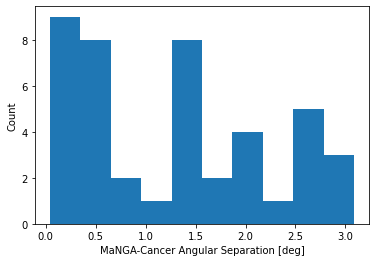

In [85]:
plt.hist(cancersep[MaNGA_in_cancer].to_value('degree'))
plt.xlabel('MaNGA-Cancer Angular Separation [deg]')
plt.ylabel('Count')

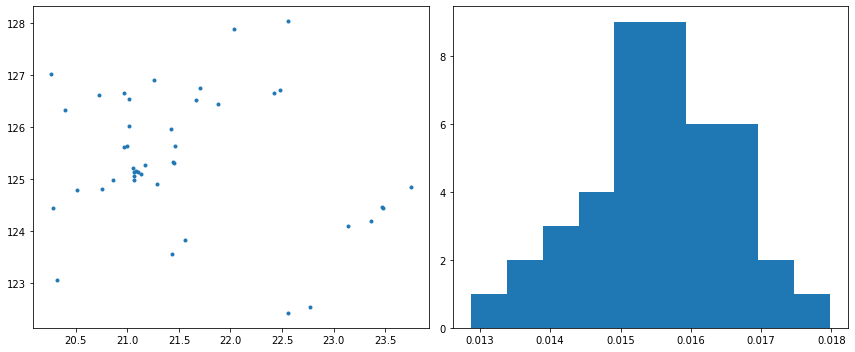

In [86]:
fig, axes = plt.subplots(1,2, figsize=(12,5), tight_layout=True)
ax = axes[0]
ax.plot(inCancer_MaNGA_table['objdec'], inCancer_MaNGA_table['objra'], '.')
ax = axes[1]
ax.hist(inCancer_MaNGA_table['z']);

## Pegasus

In [80]:
pg_nest = 206806

pg_row_t3 = table3['Nest'] == pg_nest

R2t_pg = table3['R2t'][pg_row_t3][0]
sigma_pg = table3['sigP'][pg_row_t3][0]

In [81]:
pg_coords = SkyCoord(table3['SGLON'][pg_row_t3]*u.degree, 
                       table3['SGLAT'][pg_row_t3]*u.degree, 
                       frame='supergalactic')

pg_group_coords = SkyCoord(table2['SGLON']*u.degree, 
                        table2['SGLAT']*u.degree, 
                        frame='supergalactic')

idx, d2d, d3d = pg_coords.match_to_catalog_sky(pg_group_coords)

V_pg = table2['__HV_'][idx][0]

In [82]:
# First, we need to convert R2t from Mpc to an angle, using the group's heliocentric velocity
R2t_pg_angle = (R2t_pg/(V_pg/H0))*u.radian

In [83]:
pg_tf_coords = SkyCoord(drpall['objra'], drpall['objdec'], unit='deg')

pgsep = pg_coords.separation(pg_tf_coords)

In [84]:
MaNGA_in_pg1 = (pgsep < 1.5*R2t_pg_angle) & (drpall['z']*c > V_pg - 3*sigma_pg) & (drpall['z']*c < V_pg + 3*sigma_pg)

MaNGA_in_pg2 = (pgsep >= 1.5*R2t_pg_angle) & (pgsep < 3*R2t_pg_angle) & (drpall['z']*c > V_pg - 2*sigma_pg) & (drpall['z']*c < V_pg + 2*sigma_pg)

MaNGA_in_pg = MaNGA_in_pg1 | MaNGA_in_pg2

################################################################################
# Keep all instances of each SGA_ID that are within the Coma cluster
#-------------------------------------------------------------------------------
MaNGA_ID_in_pg = np.unique(drpall['mangaid'][MaNGA_in_pg])

idx_MaNGA_in_pg = np.in1d(drpall['mangaid'], MaNGA_ID_in_pg)

inPegasus_MaNGA_table = drpall[idx_MaNGA_in_pg]
################################################################################

inPegasus_MaNGA_table

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag [7],nsa_elpetro_absmag [7],nsa_elpetro_amivar [7],nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction [7],nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux [7],nsa_petro_flux_ivar [7],nsa_elpetro_flux [7],nsa_elpetro_flux_ivar [7],nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux [7],nsa_sersic_flux_ivar [7]
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


## Hydra

In [85]:
hy_nest = 106867

hy_row_t3 = table3['Nest'] == hy_nest

R2t_hy = table3['R2t'][hy_row_t3][0]
sigma_hy = table3['sigP'][hy_row_t3][0]

In [86]:
hy_coords = SkyCoord(table3['SGLON'][hy_row_t3]*u.degree, 
                       table3['SGLAT'][hy_row_t3]*u.degree, 
                       frame='supergalactic')

hy_group_coords = SkyCoord(table2['SGLON']*u.degree, 
                        table2['SGLAT']*u.degree, 
                        frame='supergalactic')

idx, d2d, d3d = hy_coords.match_to_catalog_sky(hy_group_coords)

V_hy = table2['__HV_'][idx][0]

In [87]:
# First, we need to convert R2t from Mpc to an angle, using the group's heliocentric velocity
R2t_hy_angle = (R2t_hy/(V_hy/H0))*u.radian

In [88]:
hy_tf_coords = SkyCoord(drpall['objra'], drpall['objdec'], unit='deg')

hysep = hy_coords.separation(hy_tf_coords)

In [89]:
MaNGA_in_hy1 = (hysep < 1.5*R2t_hy_angle) & (drpall['z']*c > V_hy - 3*sigma_hy) & (drpall['z']*c < V_hy + 3*sigma_hy)

MaNGA_in_hy2 = (hysep >= 1.5*R2t_hy_angle) & (hysep < 3*R2t_hy_angle) & (drpall['z']*c > V_hy - 2*sigma_hy) & (drpall['z']*c < V_hy + 2*sigma_hy)

MaNGA_in_hy = MaNGA_in_hy1 | MaNGA_in_hy2

################################################################################
# Keep all instances of each SGA_ID that are within the Coma cluster
#-------------------------------------------------------------------------------
MaNGA_ID_in_hy = np.unique(drpall['mangaid'][MaNGA_in_hy])

idx_MaNGA_in_hy = np.in1d(drpall['mangaid'], MaNGA_ID_in_hy)

inHydra_MaNGA_table = drpall[idx_MaNGA_in_hy]
################################################################################

inHydra_MaNGA_table

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag [7],nsa_elpetro_absmag [7],nsa_elpetro_amivar [7],nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction [7],nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux [7],nsa_petro_flux_ivar [7],nsa_elpetro_flux [7],nsa_elpetro_flux_ivar [7],nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux [7],nsa_sersic_flux_ivar [7]
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


## NGC 70

In [90]:
ngc70_nest = 200646

ngc70_row_t3 = table3['Nest'] == ngc70_nest

R2t_ngc70 = table3['R2t'][ngc70_row_t3][0]
sigma_ngc70 = table3['sigP'][ngc70_row_t3][0]

In [91]:
ngc70_coords = SkyCoord(table3['SGLON'][ngc70_row_t3]*u.degree, 
                       table3['SGLAT'][ngc70_row_t3]*u.degree, 
                       frame='supergalactic')

ngc70_group_coords = SkyCoord(table2['SGLON']*u.degree, 
                        table2['SGLAT']*u.degree, 
                        frame='supergalactic')

idx, d2d, d3d = ngc70_coords.match_to_catalog_sky(ngc70_group_coords)

V_ngc70 = table2['__HV_'][idx][0]

In [92]:
# First, we need to convert R2t from Mpc to an angle, using the group's heliocentric velocity
R2t_ngc70_angle = (R2t_ngc70/(V_ngc70/H0))*u.radian

In [93]:
ngc70_tf_coords = SkyCoord(drpall['objra'], drpall['objdec'], unit='deg')

n70sep = ngc70_coords.separation(ngc70_tf_coords)

In [94]:
MaNGA_in_ngc701 = (n70sep < 1.5*R2t_ngc70_angle) & (drpall['z']*c > V_ngc70 - 3*sigma_ngc70) & (drpall['z']*c < V_ngc70 + 3*sigma_ngc70)

MaNGA_in_ngc702 = (n70sep >= 1.5*R2t_ngc70_angle) & (n70sep < 3*R2t_ngc70_angle) & (drpall['z']*c > V_ngc70 - 2*sigma_ngc70) & (drpall['z']*c < V_ngc70 + 2*sigma_ngc70)

MaNGA_in_ngc70 = MaNGA_in_ngc701 | MaNGA_in_ngc702

################################################################################
# Keep all instances of each SGA_ID that are within the Coma cluster
#-------------------------------------------------------------------------------
MaNGA_ID_in_ngc70 = np.unique(drpall['mangaid'][MaNGA_in_ngc70])

idx_MaNGA_in_ngc70 = np.in1d(drpall['mangaid'], MaNGA_ID_in_ngc70)

inNGC70_MaNGA_table = drpall[idx_MaNGA_in_ngc70]
################################################################################

inNGC70_MaNGA_table

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag [7],nsa_elpetro_absmag [7],nsa_elpetro_amivar [7],nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction [7],nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux [7],nsa_petro_flux_ivar [7],nsa_elpetro_flux [7],nsa_elpetro_flux_ivar [7],nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux [7],nsa_sersic_flux_ivar [7]
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


## NGC 80

In [95]:
ngc80_nest = 201682

ngc80_row_t3 = table3['Nest'] == ngc80_nest

R2t_ngc80 = table3['R2t'][ngc80_row_t3][0]
sigma_ngc80 = table3['sigP'][ngc80_row_t3][0]

In [96]:
ngc80_coords = SkyCoord(table3['SGLON'][ngc80_row_t3]*u.degree, 
                       table3['SGLAT'][ngc80_row_t3]*u.degree, 
                       frame='supergalactic')

ngc80_group_coords = SkyCoord(table2['SGLON']*u.degree, 
                        table2['SGLAT']*u.degree, 
                        frame='supergalactic')

idx, d2d, d3d = ngc80_coords.match_to_catalog_sky(ngc80_group_coords)

V_ngc80 = table2['__HV_'][idx][0]

In [97]:
# First, we need to convert R2t from Mpc to an angle, using the group's heliocentric velocity
R2t_ngc80_angle = (R2t_ngc80/(V_ngc80/H0))*u.radian

In [98]:
ngc80_tf_coords = SkyCoord(drpall['objra'], drpall['objdec'], unit='deg')

n80sep = ngc80_coords.separation(ngc80_tf_coords)

In [99]:
MaNGA_in_ngc801 = (n80sep < 1.5*R2t_ngc80_angle) & (drpall['z']*c > V_ngc80 - 3*sigma_ngc80) & (drpall['z']*c < V_ngc80 + 3*sigma_ngc80)

MaNGA_in_ngc802 = (n80sep >= 1.5*R2t_ngc80_angle) & (n80sep < 3*R2t_ngc80_angle) & (drpall['z']*c > V_ngc80 - 2*sigma_ngc80) & (drpall['z']*c < V_ngc80 + 2*sigma_ngc80)

MaNGA_in_ngc80 = MaNGA_in_ngc801 | MaNGA_in_ngc802

################################################################################
# Keep all instances of each SGA_ID that are within the Coma cluster
#-------------------------------------------------------------------------------
MaNGA_ID_in_ngc80 = np.unique(drpall['mangaid'][MaNGA_in_ngc80])

idx_MaNGA_in_ngc80 = np.in1d(drpall['mangaid'], MaNGA_ID_in_ngc80)

inNGC80_MaNGA_table = drpall[idx_MaNGA_in_ngc80]
################################################################################

inNGC80_MaNGA_table

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag [7],nsa_elpetro_absmag [7],nsa_elpetro_amivar [7],nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction [7],nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux [7],nsa_petro_flux_ivar [7],nsa_elpetro_flux [7],nsa_elpetro_flux_ivar [7],nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux [7],nsa_sersic_flux_ivar [7]
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


## NGC 410

In [100]:
ngc410_nest = 200005

ngc410_row_t3 = table3['Nest'] == ngc410_nest

R2t_ngc410 = table3['R2t'][ngc410_row_t3][0]
sigma_ngc410 = table3['sigP'][ngc410_row_t3][0]

In [101]:
ngc410_coords = SkyCoord(table3['SGLON'][ngc410_row_t3]*u.degree, 
                       table3['SGLAT'][ngc410_row_t3]*u.degree, 
                       frame='supergalactic')

ngc410_group_coords = SkyCoord(table2['SGLON']*u.degree, 
                        table2['SGLAT']*u.degree, 
                        frame='supergalactic')

idx, d2d, d3d = ngc410_coords.match_to_catalog_sky(ngc410_group_coords)

V_ngc410 = table2['__HV_'][idx][0]

In [102]:
# First, we need to convert R2t from Mpc to an angle, using the group's heliocentric velocity
R2t_ngc410_angle = (R2t_ngc410/(V_ngc410/H0))*u.radian

In [103]:
ngc410_tf_coords = SkyCoord(drpall['objra'], drpall['objdec'], unit='deg')

n410sep = ngc410_coords.separation(ngc410_tf_coords)

In [104]:
MaNGA_in_ngc4101 = (n410sep < 1.5*R2t_ngc410_angle) & (drpall['z']*c > V_ngc410 - 3*sigma_ngc410) & (drpall['z']*c < V_ngc410 + 3*sigma_ngc410)

MaNGA_in_ngc4102 = (n410sep >= 1.5*R2t_ngc410_angle) & (n410sep < 3*R2t_ngc410_angle) & (drpall['z']*c > V_ngc410 - 2*sigma_ngc410) & (drpall['z']*c < V_ngc410 + 2*sigma_ngc410)

MaNGA_in_ngc410 = MaNGA_in_ngc4101 | MaNGA_in_ngc4102

################################################################################
# Keep all instances of each SGA_ID that are within the Coma cluster
#-------------------------------------------------------------------------------
MaNGA_ID_in_ngc410 = np.unique(drpall['mangaid'][MaNGA_in_ngc410])

idx_MaNGA_in_ngc410 = np.in1d(drpall['mangaid'], MaNGA_ID_in_ngc410)

inNGC410_MaNGA_table = drpall[idx_MaNGA_in_ngc410]
################################################################################

inNGC410_MaNGA_table

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag [7],nsa_elpetro_absmag [7],nsa_elpetro_amivar [7],nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction [7],nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux [7],nsa_petro_flux_ivar [7],nsa_elpetro_flux [7],nsa_elpetro_flux_ivar [7],nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux [7],nsa_sersic_flux_ivar [7]
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


## NGC 507

In [107]:
ngc507_nest = 209354

ngc507_row_t3 = table3['Nest'] == ngc507_nest

R2t_ngc507 = table3['R2t'][ngc507_row_t3][0]
sigma_ngc507 = table3['sigP'][ngc507_row_t3][0]

In [108]:
ngc507_coords = SkyCoord(table3['SGLON'][ngc507_row_t3]*u.degree, 
                       table3['SGLAT'][ngc507_row_t3]*u.degree, 
                       frame='supergalactic')

ngc507_group_coords = SkyCoord(table2['SGLON']*u.degree, 
                        table2['SGLAT']*u.degree, 
                        frame='supergalactic')

idx, d2d, d3d = ngc507_coords.match_to_catalog_sky(ngc507_group_coords)

V_ngc507 = table2['__HV_'][idx][0]

In [109]:
# First, we need to convert R2t from Mpc to an angle, using the group's heliocentric velocity
R2t_ngc507_angle = (R2t_ngc507/(V_ngc507/H0))*u.radian

In [110]:
ngc507_tf_coords = SkyCoord(drpall['objra'], drpall['objdec'], unit='deg')

n507sep = ngc507_coords.separation(ngc507_tf_coords)

In [111]:
MaNGA_in_ngc5071 = (n507sep < 1.5*R2t_ngc507_angle) & (drpall['z']*c > V_ngc507 - 3*sigma_ngc507) & (drpall['z']*c < V_ngc507 + 3*sigma_ngc507)

MaNGA_in_ngc5072 = (n507sep >= 1.5*R2t_ngc507_angle) & (n507sep < 3*R2t_ngc507_angle) & (drpall['z']*c > V_ngc507 - 2*sigma_ngc507) & (drpall['z']*c < V_ngc507 + 2*sigma_ngc507)

MaNGA_in_ngc507 = MaNGA_in_ngc5071 | MaNGA_in_ngc5072

################################################################################
# Keep all instances of each SGA_ID that are within the Coma cluster
#-------------------------------------------------------------------------------
MaNGA_ID_in_ngc507 = np.unique(drpall['mangaid'][MaNGA_in_ngc507])

idx_MaNGA_in_ngc507 = np.in1d(drpall['mangaid'], MaNGA_ID_in_ngc507)

inNGC507_MaNGA_table = drpall[idx_MaNGA_in_ngc507]
################################################################################

inNGC507_MaNGA_table

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag [7],nsa_elpetro_absmag [7],nsa_elpetro_amivar [7],nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction [7],nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux [7],nsa_petro_flux_ivar [7],nsa_elpetro_flux [7],nsa_elpetro_flux_ivar [7],nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux [7],nsa_sersic_flux_ivar [7]
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


## Abell 262

In [112]:
a262_nest = 200065

a262_row_t3 = table3['Nest'] == a262_nest

R2t_a262 = table3['R2t'][a262_row_t3][0]
sigma_a262 = table3['sigP'][a262_row_t3][0]

In [113]:
a262_coords = SkyCoord(table3['SGLON'][a262_row_t3]*u.degree, 
                       table3['SGLAT'][a262_row_t3]*u.degree, 
                       frame='supergalactic')

a262_group_coords = SkyCoord(table2['SGLON']*u.degree, 
                        table2['SGLAT']*u.degree, 
                        frame='supergalactic')

idx, d2d, d3d = a262_coords.match_to_catalog_sky(a262_group_coords)

V_a262 = table2['__HV_'][idx][0]

In [114]:
# First, we need to convert R2t from Mpc to an angle, using the group's heliocentric velocity
R2t_a262_angle = (R2t_a262/(V_a262/H0))*u.radian

In [115]:
a262_tf_coords = SkyCoord(drpall['objra'], drpall['objdec'], unit='deg')

a262sep = a262_coords.separation(a262_tf_coords)

In [117]:
MaNGA_in_a2621 = (a262sep < 1.5*R2t_a262_angle) & (drpall['z']*c > V_a262 - 3*sigma_a262) & (drpall['z']*c < V_a262 + 3*sigma_a262)

MaNGA_in_a2622 = (a262sep >= 1.5*R2t_a262_angle) & (a262sep < 3*R2t_a262_angle) & (drpall['z']*c > V_a262 - 2*sigma_a262) & (drpall['z']*c < V_a262 + 2*sigma_a262)

MaNGA_in_a262 = MaNGA_in_a2621 | MaNGA_in_a2622

################################################################################
# Keep all instances of each SGA_ID that are within the Coma cluster
#-------------------------------------------------------------------------------
MaNGA_ID_in_a262 = np.unique(drpall['mangaid'][MaNGA_in_a262])

idx_MaNGA_in_a262 = np.in1d(drpall['mangaid'], MaNGA_ID_in_a262)

inA262_MaNGA_table = drpall[idx_MaNGA_in_a262]
################################################################################

inA262_MaNGA_table

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag [7],nsa_elpetro_absmag [7],nsa_elpetro_amivar [7],nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction [7],nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux [7],nsa_petro_flux_ivar [7],nsa_elpetro_flux [7],nsa_elpetro_flux_ivar [7],nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux [7],nsa_sersic_flux_ivar [7]
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


## Abell 400

In [118]:
a400_nest = 201600

a400_row_t3 = table3['Nest'] == a400_nest

R2t_a400 = table3['R2t'][a400_row_t3][0]
sigma_a400 = table3['sigP'][a400_row_t3][0]

In [119]:
a400_coords = SkyCoord(table3['SGLON'][a400_row_t3]*u.degree, 
                       table3['SGLAT'][a400_row_t3]*u.degree, 
                       frame='supergalactic')

a400_group_coords = SkyCoord(table2['SGLON']*u.degree, 
                        table2['SGLAT']*u.degree, 
                        frame='supergalactic')

idx, d2d, d3d = a400_coords.match_to_catalog_sky(a400_group_coords)

V_a400 = table2['__HV_'][idx][0]

In [120]:
# First, we need to convert R2t from Mpc to an angle, using the group's heliocentric velocity
R2t_a400_angle = (R2t_a400/(V_a400/H0))*u.radian

In [121]:
a400_tf_coords = SkyCoord(drpall['objra'], drpall['objdec'], unit='deg')

a400sep = a400_coords.separation(a400_tf_coords)

In [122]:
MaNGA_in_a4001 = (a400sep < 1.5*R2t_a400_angle) & (drpall['z']*c > V_a400 - 3*sigma_a400) & (drpall['z']*c < V_a400 + 3*sigma_a400)

MaNGA_in_a4002 = (a400sep >= 1.5*R2t_a400_angle) & (a400sep < 3*R2t_a400_angle) & (drpall['z']*c > V_a400 - 2*sigma_a400) & (drpall['z']*c < V_a400 + 2*sigma_a400)

MaNGA_in_a400 = MaNGA_in_a4001 | MaNGA_in_a4002

################################################################################
# Keep all instances of each SGA_ID that are within the Coma cluster
#-------------------------------------------------------------------------------
MaNGA_ID_in_a400 = np.unique(drpall['mangaid'][MaNGA_in_a400])

idx_MaNGA_in_a400 = np.in1d(drpall['mangaid'], MaNGA_ID_in_a400)

inA400_MaNGA_table = drpall[idx_MaNGA_in_a400]
################################################################################

inA400_MaNGA_table

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag [7],nsa_elpetro_absmag [7],nsa_elpetro_amivar [7],nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction [7],nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux [7],nsa_petro_flux_ivar [7],nsa_elpetro_flux [7],nsa_elpetro_flux_ivar [7],nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux [7],nsa_sersic_flux_ivar [7]
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


## Fornax

In [128]:
for_nest = 200015

for_row_t3 = table3['Nest'] == for_nest

R2t_for = table3['R2t'][for_row_t3][0]
sigma_for = table3['sigP'][for_row_t3][0]

In [129]:
for_coords = SkyCoord(table3['SGLON'][for_row_t3]*u.degree, 
                       table3['SGLAT'][for_row_t3]*u.degree, 
                       frame='supergalactic')

for_group_coords = SkyCoord(table2['SGLON']*u.degree, 
                        table2['SGLAT']*u.degree, 
                        frame='supergalactic')

idx, d2d, d3d = for_coords.match_to_catalog_sky(for_group_coords)

V_for = table2['__HV_'][idx][0]

In [130]:
# First, we need to convert R2t from Mpc to an angle, using the group's heliocentric velocity
R2t_for_angle = (R2t_for/(V_for/H0))*u.radian

In [131]:
for_tf_coords = SkyCoord(drpall['objra'], drpall['objdec'], unit='deg')

forsep = for_coords.separation(for_tf_coords)

In [132]:
MaNGA_in_for1 = (forsep < 1.5*R2t_for_angle) & (drpall['z']*c > V_for - 3*sigma_for) & (drpall['z']*c < V_for + 3*sigma_for)

MaNGA_in_for2 = (forsep >= 1.5*R2t_for_angle) & (forsep < 3*R2t_for_angle) & (drpall['z']*c > V_for - 2*sigma_for) & (drpall['z']*c < V_for + 2*sigma_for)

MaNGA_in_for = MaNGA_in_for1 | MaNGA_in_for2

################################################################################
# Keep all instances of each SGA_ID that are within the Coma cluster
#-------------------------------------------------------------------------------
MaNGA_ID_in_for = np.unique(drpall['mangaid'][MaNGA_in_for])

idx_MaNGA_in_for = np.in1d(drpall['mangaid'], MaNGA_ID_in_for)

inFornax_MaNGA_table = drpall[idx_MaNGA_in_for]
################################################################################

inFornax_MaNGA_table

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag [7],nsa_elpetro_absmag [7],nsa_elpetro_amivar [7],nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction [7],nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux [7],nsa_petro_flux_ivar [7],nsa_elpetro_flux [7],nsa_elpetro_flux_ivar [7],nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux [7],nsa_sersic_flux_ivar [7]
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


## Antlia

In [133]:
ant_nest = 100014

ant_row_t3 = table3['Nest'] == ant_nest

R2t_ant = table3['R2t'][ant_row_t3][0]
sigma_ant = table3['sigP'][ant_row_t3][0]

In [134]:
ant_coords = SkyCoord(table3['SGLON'][ant_row_t3]*u.degree, 
                       table3['SGLAT'][ant_row_t3]*u.degree, 
                       frame='supergalactic')

ant_group_coords = SkyCoord(table2['SGLON']*u.degree, 
                        table2['SGLAT']*u.degree, 
                        frame='supergalactic')

idx, d2d, d3d = ant_coords.match_to_catalog_sky(ant_group_coords)

V_ant = table2['__HV_'][idx][0]

In [135]:
# First, we need to convert R2t from Mpc to an angle, using the group's heliocentric velocity
R2t_ant_angle = (R2t_ant/(V_ant/H0))*u.radian

In [136]:
ant_tf_coords = SkyCoord(drpall['objra'], drpall['objdec'], unit='deg')

antsep = ant_coords.separation(ant_tf_coords)

In [137]:
MaNGA_in_ant1 = (antsep < 1.5*R2t_ant_angle) & (drpall['z']*c > V_ant - 3*sigma_ant) & (drpall['z']*c < V_ant + 3*sigma_ant)

MaNGA_in_ant2 = (antsep >= 1.5*R2t_ant_angle) & (antsep < 3*R2t_ant_angle) & (drpall['z']*c > V_ant - 2*sigma_ant) & (drpall['z']*c < V_ant + 2*sigma_ant)

MaNGA_in_ant = MaNGA_in_ant1 | MaNGA_in_ant2

################################################################################
# Keep all instances of each SGA_ID that are within the Coma cluster
#-------------------------------------------------------------------------------
MaNGA_ID_in_ant = np.unique(drpall['mangaid'][MaNGA_in_ant])

idx_MaNGA_in_ant = np.in1d(drpall['mangaid'], MaNGA_ID_in_ant)

inAntlia_MaNGA_table = drpall[idx_MaNGA_in_ant]
################################################################################

inAntlia_MaNGA_table

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag [7],nsa_elpetro_absmag [7],nsa_elpetro_amivar [7],nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction [7],nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux [7],nsa_petro_flux_ivar [7],nsa_elpetro_flux [7],nsa_elpetro_flux_ivar [7],nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux [7],nsa_sersic_flux_ivar [7]
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
